# Исследование объявлений о продаже квартир

Имеем данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Задача:** научиться определять рыночную стоимость объектов недвижимости. Для этого необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Открываем файл с данными и изучаем общую информацию

Импортируем библиотеки и прочитаем файл, сохраним его в переменную data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучим основную информацию о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Построим гистограммы для всех числовых столбцов датафрейма:

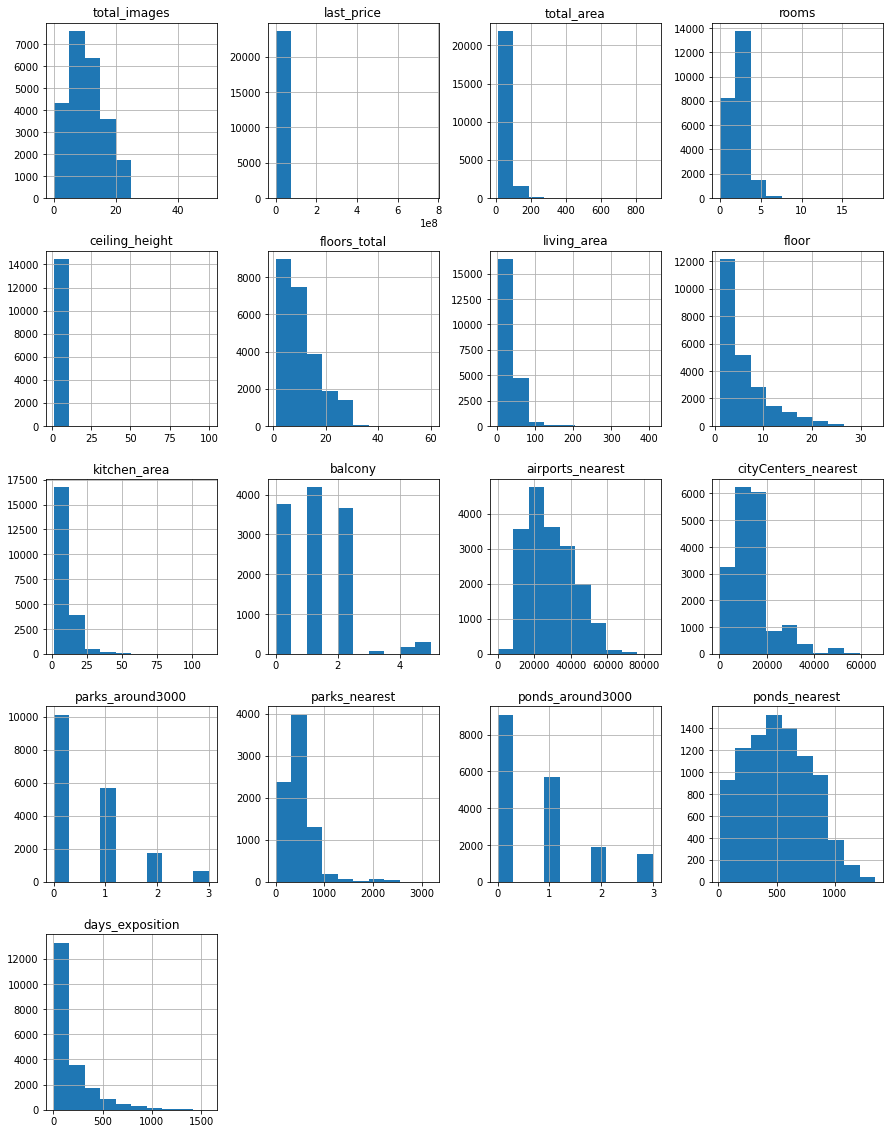

In [4]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### **Проверка корректной записи названий столбцов:**

In [5]:
data.columns.unique()

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Исправляем некорректную запись названий трех столбцов, переименовываем их. Остальные названия оставляем без изменений.

In [6]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 
                            'ponds_around3000' : 'ponds_around_3000', 
                            'parks_around3000' : 'parks_around_3000'})

#### **Проверка наличия дубликатов:**

In [7]:
data.duplicated().sum()

0

Дубликатов не выявлено.

#### **Проверка наличия пропущенных значений, типов данных:**

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Вывод:** обнаружены пропуски в данных и несоответствие типов данных.

#### Исправление/заполнение пропущенных значений. Изменение типов данных.

#####  "balcony" - количество балконов в квартире.

Пропуски: 11519 - могут означать, что в данной квартире нет балконов, значит, пропуск можно заменить на 0 (ноль). Изменим тип данных с float64 на int64, т.к число балконов может быть только целочисленным значением:

In [10]:
data['balcony'] = data['balcony'].fillna(0).round(0)
data['balcony'] = data['balcony'].astype(int)

In [11]:
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

##### "is_apartment" - это апартаменты.

Пропуски: 20924. Предположим, что они означают то, что данная квартира не является апартаментами. Проверяем, можно ли заменить пропуски на False:

In [12]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Количество пропусков: 20924, всего апартаментов: 50, общее количество квартир: 23699. Если предположить, что пропуск = квартира не апартаменты и заменить пропуски на False, то окажется, что из 23699 квартир всего 50 являются апартаментами, что в действительности маловероятно. Поэтому заменить пропуски на значение False будет некорректно. Оставляем их без изменений. Но изменяем тип данных с object на bool:

In [13]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].dtypes

dtype('bool')

##### "locality_name" - название населенного пункта. 

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Пропуски: 49 - заменяем на значение "unknown". Приводим все названия населенных пунктов к нижнему регистру и в значениях оставлям только названия без уточнений (без: поселок, село и тп.):

In [15]:
data['locality_name'] = data['locality_name'].fillna('unknown').str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(
    ['поселок ', 'городской ', 'деревня ', 'коттеджный ', 'городского типа ', 'станции ', 'при железнодорожной ', 
     'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село '], '', regex=True)

In [16]:
sorted(data['locality_name'].unique())

['unknown',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'имени мо

Проверяем наличие дубликатов после изменения названия населенных пунктов:

In [17]:
data.duplicated().sum()

0

#####  "floors_total" - всего этажей в доме.

Пропуски: 86 - заполняем медианой, но не одной общей по всем квартирам, а по городам. Например, пропуск в доме в Санкт-Петербурге будет заполнен медианным значением по всем домам Санкт-Петербурга и т.д по всем городам соответственно. Изменяем тип данных с float64 на int64, т.к число этажей в доме может быть только целочисленным значением:

In [18]:
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == elem), 'floors_total'].median()

In [19]:
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].dtypes

dtype('int64')

In [20]:
data['floors_total'].isna().sum()

0

#####  "ceiling_height" - высота потолков в квартире. 

In [21]:
data['ceiling_height'].sort_values(ascending=False).head(20)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
Name: ceiling_height, dtype: float64

В данных 'ceiling_height' (высота потолков) обнаружены значения, которые не могут соответствовать действительности. Например, высота потолков от 20 до 100 метров. Если же высоты в 10 и 14 м можно отнести к многоуровневым помещениям, то высота от 20 м слишком велика. Возможно, что данные были внесены неверно в виду человеческого фактора и необходимо перенести одну запятую влево, в результате будет от 2 до 10 метров вместо 20 и 100 метров соответственно:

In [22]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'] = data['ceiling_height'].round(2)
data['ceiling_height'].sort_values(ascending=False).head(10)

15061    14.0
22309    10.3
22869    10.0
5863      8.3
3474      8.0
17442     8.0
15743     8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64

Пропуски: 9195 - заполняем средним значением высоты потолков по городам. Например, пропуск в квартире в Санкт-Петербурге будет заполнен средним значением высоты потолков по всем квартирам Санкт-Петербурга и т.д по всем городам соответственно:

In [23]:
for elem in data['locality_name'].unique():
    data.loc[(data['locality_name'] == elem) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == elem), 'ceiling_height'].mean()

In [24]:
data['ceiling_height'].isna().sum()

95

Осталось не заполнено 95 пропусков. Причина: 1 квартира в 1 населенном пункте и та с пропуском, поэтому для расчета среднего нет данных. Оставшиеся пропуски не повлияют на результат дальнейшего исследования.

##### "kitchen_area" - площадь кухни в квартире. 

Пропуски: 2278 - могут означать то, что в данной квартире нет кухни или пропуск относится к квартире-студии, в которой нет четкого деления на помещения. Поэтому заполнять данные пропуски некорректно. Оставляем без изменений.

##### "living_area" - жилая площадь.

Пропуски: 1903 - могут означать то, что данная квартира относится к квартире-студии (как и в случае с площадью кухни), в которой нет четкого деления на помещения. Поэтому заполнять данные пропуски некорректно. Оставляем без изменений.

#####  "parks_around_3000" - число парков в радиусе 3 км. 

Пропуски: 5518 - могут означать то, что в данном радиусе нет парков либо произошла ошибка при загрузке картографических данных. Заполняем пропуски 0 (нулем). Изменяем тип данных с float64 на int64, т.к число парков может быть только целочисленным значением:

In [25]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).round(1)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['parks_around_3000'].dtypes

dtype('int64')

In [26]:
data['parks_around_3000'].isna().sum()

0

#####  "ponds_around_3000" - число водоёмов в радиусе 3 км. 

Пропуски: 5518 - могут означать то, что в данном радиусе нет водоёмов либо произошла ошибка при загрузке картографических данных. Заполняем пропуски 0 (нулем). Изменим тип данных с float64 на int64, т.к число водоёмов может быть только целочисленным значением:

In [27]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).round(1)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['ponds_around_3000'].dtypes

dtype('int64')

In [28]:
data['ponds_around_3000'].isna().sum()

0

#####  "days_exposition" - количество дней размещения объявления.

Пропуски: 3181 - могут означать, что объявление еще активно, квартира не продана. Заполнять их будет некорректно.

##### "city_centers_nearest" - расстояние до центра города.

Пропуски: 5519 - могут означать, что что данная квартира находится не в городе (поселок, село, станция и тп.) либо произошла ошибка при загрузке картографических данных. Заполнять не будем.

##### "airports_nearest" - расстояние до аэропорта.

Пропуски: 5542 - могут означать, что в данном населенном пункте аэропорта нет либо он слишком далеко, либо произошла ошибка при загрузке картографических данных. Заполнить их нулем, медианой или средним будет некорректно.

##### "parks_nearest" - расстояние до парков.

Пропуски: 15620 - могут означать, что в данном населенном пункте парков нет либо они слишком далеко, либо произошла ошибка при загрузке картографических данных. Заполнить их нулем, медианой или средним будет некорректно.

##### "ponds_nearest" - расстояние до водоемов.

Пропуски: 14589 - могут означать, что в данном населенном пункте водоемов нет либо они слишком далеко, либо произошла ошибка при загрузке картографических данных. Заполнить их нулем, медианой или средним будет некорректно.

##### 'last_price' - цена на момент снятия с публикации.

Изменим тип c float64 на int64:

In [29]:
data['last_price'] = data['last_price'].astype(int)
data['last_price'].dtypes

dtype('int64')

##### "first_day_exposition" - дата публикации.

Изменим тип c object на datetime:

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.700000,16,51.00,8,True,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.644470,11,18.60,1,True,False,False,11.00,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.767358,5,34.30,4,True,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.767358,14,NaN,9,True,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.030000,14,32.00,13,True,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.632759,12,14.40,5,True,False,False,9.10,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.630292,26,10.60,6,True,False,False,14.40,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.767358,24,NaN,22,True,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.692281,27,15.43,26,True,False,False,8.81,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.500000,9,43.60,7,True,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Проверяем результат:

In [31]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### **Вывод:** 

**При выполнении предобработки данных было обнаружено/исправлено:**

1. **Некорректные названия столбцов**, исправлены: 'cityCenters_nearest' на 'city_centers_nearest', 'ponds_around3000' на 'ponds_around_3000', 'parks_around3000' на 'parks_around_3000';


2. **Пропуски:**
- колонка 'balcony' - заменены на 0 (ноль), т.к. вполне возможно, что в данной квартире отсутствует балкон;
- колонка 'is_apartment' - оставлены, т.к. маловерятно, что данные пропуски могут означать то, что квартира не является апартаментами, но и однозначно утверждать, что "да" - мы не можем. Заполнять данные пропуски некорректно;
- колонка 'floors_total' - заполнены медианным значением этажности домов согласно местонахождения по городу;
- колонка 'ceiling_height' - заполнены средним значением высоты потолков согласно местонахождения по городу;
- колонка 'kitchen_area' - оставлены, т.к. вполне возможно, что в данной квартире нет кухни либо пропуск относится к квартире-студии, в которой нет четкого деления на помещения. Заполнять данные пропуски некорректно;
- колонка 'living_area' - оставлены, т.к. вполне возможно, что данная квартира относится к квартире-студии (как и в случае с площадью кухни), в которой нет четкого деления на помещения. Заполнять данные пропуски некорректно;
- колонки 'parks_around_3000', 'ponds_around_3000' - заполнены 0 (нулями), т.к. вполне возможно, что в радиусе 3 км от квартиры нет ни парков, ни водоемов либо произошла ошибка при загрузке картографических данных;
- колонки 'airports_nearest', 'ponds_nearest', 'parks_nearest' - оставлены, т.к заполнять нулями, средним или медианой будет некорректно, это может исказить дальнейшие расчеты. Пропуски могут означать, что в данном населенном пункте их либо нет, либо они слишком далеко, либо произошла ошибка при загрузке картографических данных;
- колонка 'city_centers_nearest' - оставлены, т.к они могут означать, что данная квартира находится не в городе (поселок, село, станция и тп.) либо произошла ошибка при загрузке картографических данных;
- колонки 'days_exposition' - оставлены, т.к. они могут означать, что объявление еще активно, квартира не продана;
- колонка 'locality_name' - заменены на значение 'unknown',  приведены все названия населенных пунктов к нижнему регистру и в значениях оставлены только названия без уточнений (без: поселок, село и тп.).

3. **Тип данных:**
- колонка 'balcony' - изменен с float64 на int64, т.к число балконов может быть только целочисленным значением;
- колонка 'is_apartment' - изменен с object на bool;
- колонка 'floors_total' - изменен float64 на int64, т.к число этажей в доме может быть только целочисленным значением;
- колонка 'parks_around_3000' - изменен с float64 на int64, т.к число парков может быть только целочисленным значением;
- колонка 'ponds_around_3000' - изменен с float64 на int64, т.к число водоёмов может быть только целочисленным значением;
- колонка 'first_day_exposition' - изменен с object на datetime;
- колонка 'last_price' - изменен с float64 на int64.

4. **Явные ошибки:**
- колонка 'ceiling_height' - обнаружены значения, которые не могут соответствовать действительности - высота потолков от 20 до 100 метров. Была перенесена запятая на один десяток влево. Возможно, что данные были внесены неверно в виду человеческого фактора.


**Возможные причины пропусков/ошибок:**

- человеческий фактор;
- ошибки при выгрузке либо загрузке данных;
- ошибки при сохранении данных.

### Добавляем в таблицу новые колонки с расчетами.

Определяем цену одного квадратного метра и добавим данные в новый столбец 'price_metre'. Изменяем тип данных на целочисленный:

In [32]:
data['price_metre'] = (data['last_price'] / data['total_area']).round(0)
data['price_metre'] = data['price_metre'].astype(int)

Определяем день недели публикации объявления и добавляем данные в новый столбец 'weekday_exposition', где 0 - понедельник, 1 - вторник и тд.:

In [33]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Определяем месяц публикации объявления и добавляем данные в новый столбец 'month_exposition', где 1 - январь, 2 - февраль и тд.:

In [34]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Определяем год публикации объявления и добавляем данные в новый столбец 'year_exposition':

In [35]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Определяем тип этажа квартиры и добавляем данные в новый столбец 'type_floor', где: 'первый' - первый этаж, 'последний' - последний этаж, 'другой' - любой другой этаж, кроме первого и последнего:

In [36]:
def types_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    return 'другой'

In [37]:
data['type_floor'] = data.apply(types_floor, axis=1)

Проверяем:

In [38]:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Определяем расстояние до центра в километрах и округляем до ближайших целых значений. Добавляем данные в новый столбец 'city_centers_nearest_km':

In [39]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

Проверяем результат (добавлениe столбцов):

In [40]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metre,weekday_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,True,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.644470,11,18.6,1,True,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.767358,5,34.3,4,True,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.767358,14,NaN,9,True,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,True,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


**Вывод:** 
В датафрейм добавлены новые колонки со следующими параметрами:

- 'price_metre' - цена одного квадратного метра;
- 'weekday_exposition' - день недели публикации объявления;
- 'month_exposition' - месяц публикации объявления;
- 'year_exposition' - год публикации объявления;
- 'type_floor' - тип этажа квартиры, где: 'первый' - первый этаж, 'последний' - последний этаж, 'другой' - любой другой этаж, кроме первого и последнего;
- 'city_centers_nearest_km' - расстояние до центра в километрах.

### Исследовательский анализ данных

#### **Изучение параметров объектов.**

Скопируем датафрейм data в новый датафрейм data_upd. Дальнейшее исследование будем проводить с data_upd, чтобы в случае удаления аномалий/выбросов, можно было проверить долю удаленных данных - она не должна превышать 10%, чтобы не искажать результат исследования.

In [41]:
data_upd = data
display(f'Размер data_upd: {data_upd.shape[0]} строк')
data_upd.head()

'Размер data_upd: 23699 строк'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metre,weekday_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.700000,16,51.0,8,True,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.644470,11,18.6,1,True,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.767358,5,34.3,4,True,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.767358,14,NaN,9,True,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.030000,14,32.0,13,True,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


##### **Общая площадь ('total_area').** 

In [42]:
data_upd['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Межквартильный размах (IQR): 29.9 (Q3-Q1)
Нормальные значения попадают в Q3+1.5IQR, в нашем случае это: 114.75. Все значения выше 114.75 считаются выбросами.
Находим долю квартир с площадью более 115 кв.м от общего количества квартир:

In [43]:
(len(data_upd.query('total_area > 115')) / len(data_upd)) * 100

5.135237773745727

Доля квартир с площадью более 115 кв.м от общего количества квартир составляет чуть больше 5%, это много.
Посчитаем долю квартир с площадью больше 200 кв.м, если их доля не превышает 1%, то уберем их из выборки, как выбросы:

In [44]:
(len(data_upd.query('total_area > 200')) / len(data_upd)) * 100

0.9578463226296469

Оставляем для анализа значения площади до 200 кв.м включительно и построим гистограмму по этим значениям:

In [45]:
data_upd = data_upd.query('total_area <= 200')
data_upd['total_area'].describe()

count    23472.000000
mean        58.179801
std         26.531909
min         12.000000
25%         40.000000
50%         51.900000
75%         68.925000
max        200.000000
Name: total_area, dtype: float64

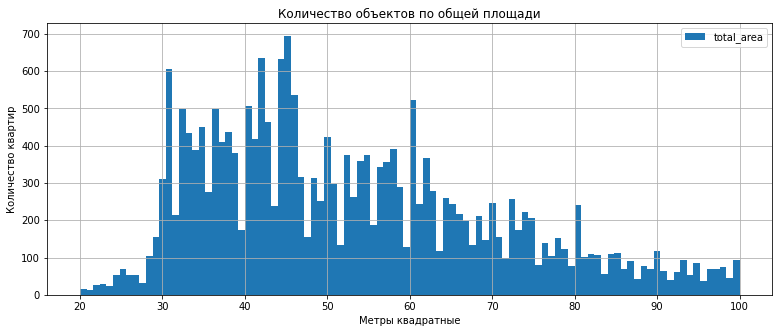

In [46]:
data_upd.plot(
    y='total_area',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(20, 100),
    title='Количество объектов по общей площади'
)
plt.xlabel('Метры квадратные')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений квартир с общей площадью от 30 до 62 кв.м, пик достигается на площади около 45 кв.м. Площади от 100 кв.м и более встречаются довольно редко. Минимальная общая площадь квартир 12.0 кв.м, максимальная - 200.0 кв.м. Медианное значение площади - 51.9 кв.м, среднее - 58.18 кв.м, что говорит о том, что медиана более устойчива к выбросам, чем среднее. 

##### **Жилая площадь ('living_area').**

In [47]:
data_upd['living_area'].describe()

count    21597.000000
mean        33.253191
std         17.366872
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

Минимальное значение жилой площади 2 кв.м - это аномальное значение, посчитаем долю квартир с жилой площадью меньше 6 кв.м:

In [48]:
(len(data_upd.query('living_area < 6')) / len(data_upd)) * 100

0.025562372188139063

Доля квартир с жилой площадью менее 6 кв.м от общего количества квартир составляет всего 0.025%, поэтому можем убрать их из выборки.

Оставляем для анализа значения жилой площади от 6 кв.м и построим гистограмму по этим значениям:

In [49]:
data_upd = data_upd.query('living_area >= 6')
data_upd['living_area'].describe()

count    21591.000000
mean        33.261487
std         17.362137
min          6.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

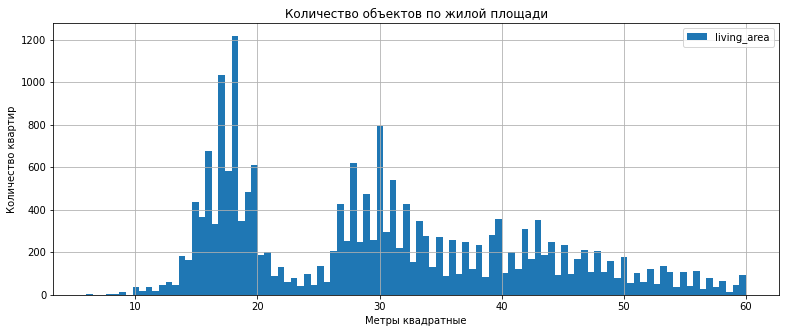

In [50]:
data_upd.plot(
    y='living_area',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(6, 60),
    title='Количество объектов по жилой площади'
)
plt.xlabel('Метры квадратные')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений квартир с жилой площадью примерно от 15 до 20 кв.м и от 27 до 33 кв.м, пик достигается на площади около 18 кв.м. Заметен сильный спад предложений с жилой площадью около 23 кв.м, а так же более 50 кв.м. Минимальная жилая площадь квартир 6.0 кв.м, максимальная - 164.7 кв.м. Медианное значение площади - 30.0 кв.м, среднее - 33.26 кв.м.

##### **Площадь кухни ('kitchen_area').**

In [51]:
data_upd['kitchen_area'].describe()

count    20789.000000
mean        10.337937
std          5.314483
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         93.200000
Name: kitchen_area, dtype: float64

In [52]:
data_upd.query('kitchen_area > 90')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metre,weekday_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
16239,5,82400000,181.1,2017-05-24,3,3.900000,9,58.2,4,False,False,False,93.2,0,санкт-петербург,25525.0,5845.0,2,116.0,0,NaN,501.0,454997,2,5,2017,другой,6.0
16797,9,65850000,146.0,2017-07-14,2,2.767358,9,40.0,3,True,False,False,93.0,0,санкт-петербург,25525.0,5845.0,2,116.0,0,NaN,77.0,451027,4,7,2017,другой,6.0


Максимальная площадь кухни 93.2 кв.м можно считать реальной, т.к. общая площадь данной квартиры 181.1 кв.м и жилая 58.2 кв.м. Вполне возможно, что на самом деле такая большая кухня, по квадратуре это не опровергается. Аналогичная ситуация и с кухней 90 кв.м. Всего 2 квартиры не дадут искажений в исследовании, но если их удалить, то могут потеряться другие данные. Оставляем.

In [53]:
data_upd.query('kitchen_area < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_metre,weekday_exposition,month_exposition,year_exposition,type_floor,city_centers_nearest_km
20217,7,4250000,28.5,2019-05-01,1,2.8,14,19.5,10,True,False,False,1.3,0,санкт-петербург,37199.0,12721.0,0,NaN,0,NaN,NaN,149123,2,5,2019,другой,13.0


Апартаменты с кухней в 1.3 кв.м при общей 28.5 кв.м и жилой 19.5 площадями тоже могут быть реальными, 1 квартира на результат исследования не повлияет. Оставляем.

Построим гистограмму:

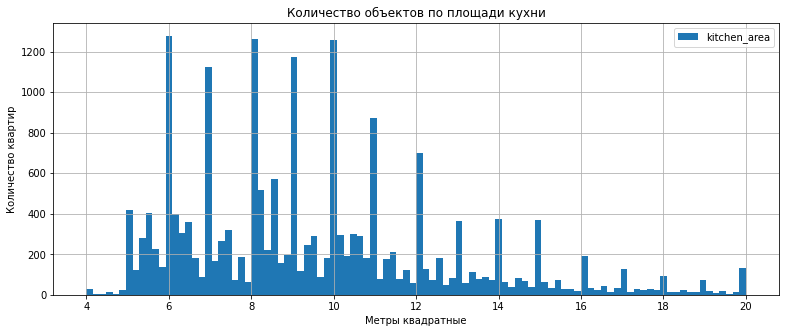

In [54]:
data_upd.plot(
    y='kitchen_area',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(4, 20),
    title='Количество объектов по площади кухни'
)
plt.xlabel('Метры квадратные')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений квартир с площадью кухни около 6 кв.м, так же наиболее часто встречаются кухни площадью 8 и 10 кв.м, затем 7, 9, 11 и 12 кв.м. Минимальная площадь кухни 1.3 кв.м, максимальная - 93.2 кв.м. Медианное значение площади - 9.0 кв.м, среднее - 10.34 кв.м.

##### **Цена объекта ('last_price').**

In [55]:
data_upd['last_price'].describe()

count    2.159100e+04
mean     6.008096e+06
std      6.201654e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.690000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

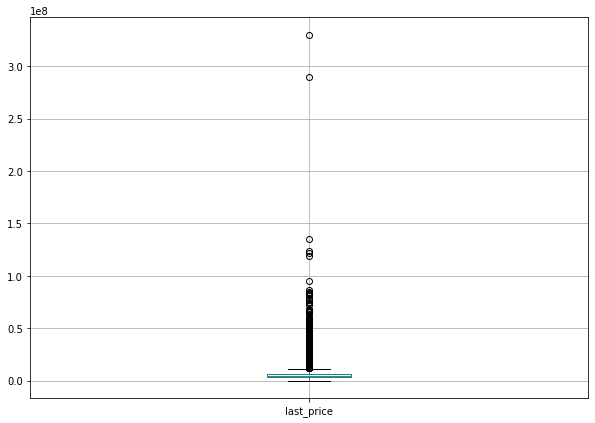

In [56]:
data_upd.boxplot(column='last_price', figsize=(10, 7))

Посчитаем долю квартир стоимостью свыше 50 млн.руб:

In [57]:
(len(data_upd.query('last_price > 50000000')) / len(data_upd)) * 100

0.20378861562688155

Квартир с аномально высокой ценой свыше 50 млн.руб не много, убираем их из исследования:

In [58]:
data_upd = data_upd.query('last_price <= 50000000')
data_upd['last_price'].describe()

count    2.154700e+04
mean     5.852333e+06
std      4.553449e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.650000e+06
max      5.000000e+07
Name: last_price, dtype: float64

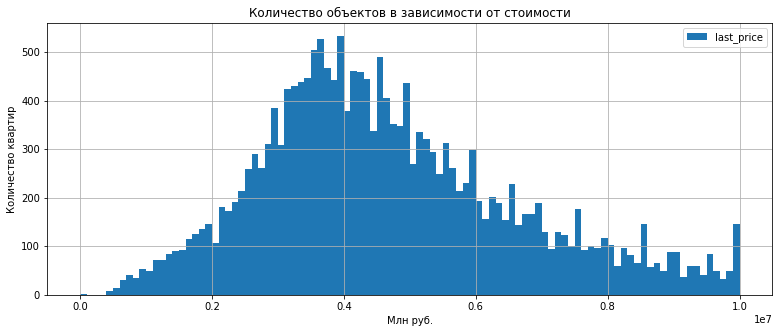

In [59]:
data_upd.plot(
    y='last_price',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(0, 10000000),
    title='Количество объектов в зависимости от стоимости'
)
plt.xlabel('Mлн руб.')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений квартир со стоимостью от 3.0 до 5.0 млн.руб, наиболее часто встречающиеся цены около: 3.6 млн.руб, 3.7 млн.руб, 4.5 млн.руб, но больше всего предложений за 4 млн.руб. Минимальная цена квартиры 12190 руб, максимальная - 49.9 млн руб. Медианное значение цены - 4.6 млн руб, среднее - 5.84 млн руб.

##### **Количество комнат ('rooms').**

In [60]:
data_upd['rooms'].describe()

count    21547.000000
mean         2.033694
std          0.994964
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

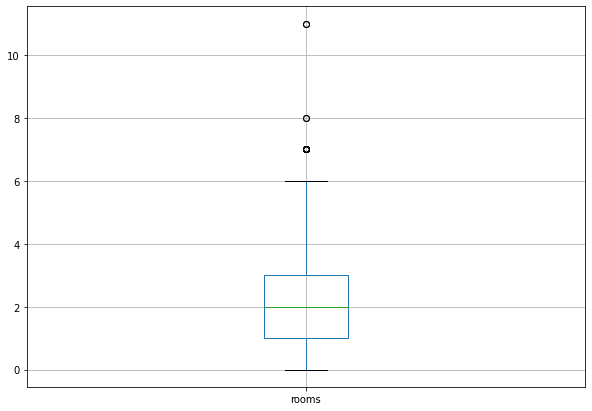

In [61]:
data_upd.boxplot(column='rooms', figsize=(10, 7))

In [62]:
zero = len(data_upd.query('rooms < 1'))
display(f'Количество квартир с числом комнат ноль: {zero}')

'Количество квартир с числом комнат ноль: 181'

In [63]:
seven = len(data_upd.query('rooms > 7'))
display(f'Количество квартир с числом комнат больше семи: {seven}')

'Количество квартир с числом комнат больше семи: 4'

Количество квартир с числом комнат, равных нулю, - 181. Возможно, что это квартиры-студии и удалять их будет неверно.

Ограничимся количеством комнат не более 7:

In [64]:
data_upd = data_upd.query('rooms <= 7')
data_upd['rooms'].describe()

count    21543.000000
mean         2.032307
std          0.989629
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

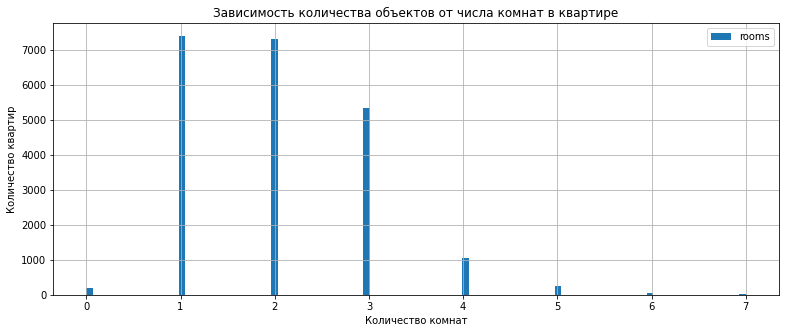

In [65]:
data_upd.plot(
    y='rooms',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    #range=(1, 5),
    title='Зависимость количества объектов от числа комнат в квартире'
)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений с однокомнатными квартирами, на втором месте двухкомнатные. По мере увеличения количества комнат, количество предложений снижается. Минимальное количество комнат 0 (ноль) - вероятно, что это квартиры-студии, максимальное - 7. Медианное значение - 2, среднее - 2.

##### **Высота потолков ('ceiling_height').**

In [66]:
data_upd['ceiling_height'].describe()

count    21470.000000
mean         2.722227
std          0.249611
min          1.000000
25%          2.589024
50%          2.700000
75%          2.767358
max         14.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

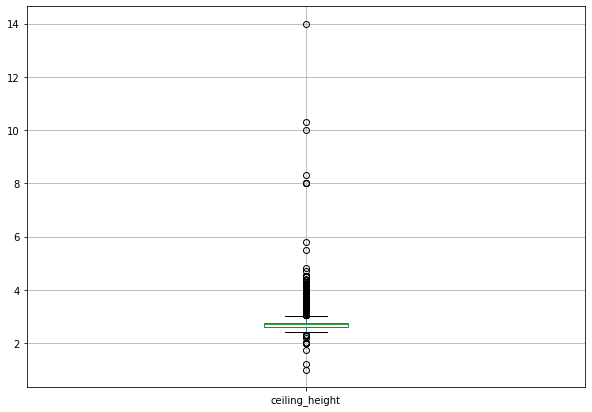

In [67]:
data_upd.boxplot(column='ceiling_height', figsize=(10, 7))

Находим долю квартир с высотой потолков до 2 м и свыше 6 м от общего количества квартир:

In [68]:
((len(data_upd.query('ceiling_height > 6')) + len(data_upd.query('ceiling_height < 2'))) / len(data_upd)) * 100

0.046418790326324094

Убираем эти квартиры из выборки, т.к. их доля равна всего 0.046%:

In [69]:
data_upd = data_upd.query('2 <= ceiling_height <= 6')
data_upd['ceiling_height'].describe()

count    21460.000000
mean         2.720208
std          0.213600
min          2.000000
25%          2.589024
50%          2.700000
75%          2.767358
max          5.800000
Name: ceiling_height, dtype: float64

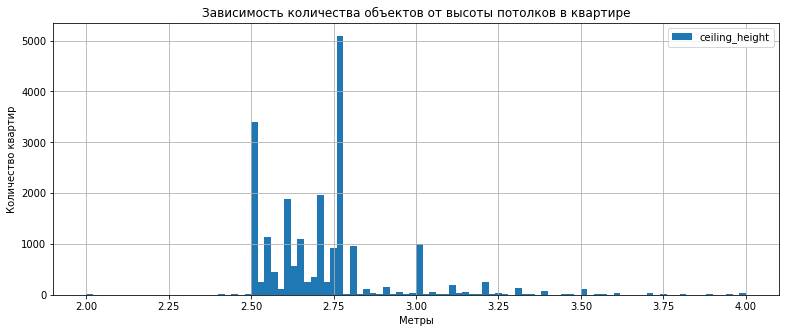

In [70]:
data_upd.plot(
    y='ceiling_height',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(2, 4),
    title='Зависимость количества объектов от высоты потолков в квартире'
)
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений с высотой потолков около 2.80 м, на втором месте по популярности высота 2.5 м. Минимальная высота потолков в квартире 2.0 м, максимальная - 6.0 кв.м. Медианное значение высоты - 2.7 м, среднее - 2.72 кв.м, очень маленькое стандартное отклонение.

##### **Тип этажа квартиры ('type_floor').**

In [71]:
data_upd['type_floor'].value_counts()

другой       15850
последний     3009
первый        2601
Name: type_floor, dtype: int64

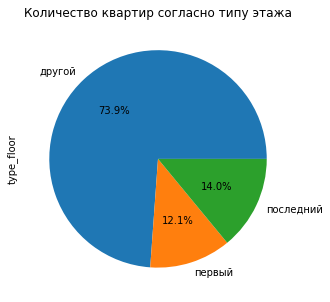

In [72]:
types = data_upd.groupby('type_floor')['type_floor'].count()
types.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5), title='Количество квартир согласно типу этажа')
plt.show()

**Вывод**: Наибольшее количество предложений квартир на всех этажах, кроме первого и последнего. Квартир на первом этаже 2601, на последнем этаже - 3009, в категории "другой" - 15850. Такое количество в "другой" обусловлено большим количеством многоэтажных домов, в эту категорию вошли все промежуточные этажи между первым и последним.

##### **Общее количество этажей в доме ('floors_total').**

In [73]:
data_upd['floors_total'].describe()

count    21460.000000
mean        10.711556
std          6.570677
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

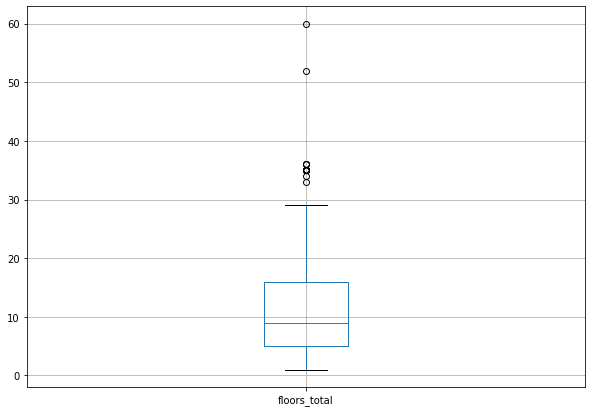

In [74]:
data_upd.boxplot(column='floors_total', figsize=(10, 7))

In [75]:
floor = len(data_upd.query('floors_total > 30'))
display(f'Количество квартир в домах, в которых больше 30 этажей: {floor} штук, удаляем их.')

'Количество квартир в домах, в которых больше 30 этажей: 30 штук, удаляем их.'

In [76]:
data_upd = data_upd.query('floors_total <= 30')
data_upd['floors_total'].describe()

count    21430.000000
mean        10.675595
std          6.501448
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

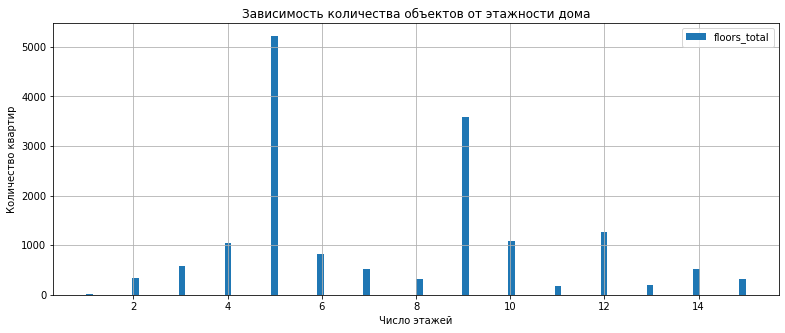

In [77]:
data_upd.plot(
    y='floors_total',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(1, 15),
    title='Зависимость количества объектов от этажности дома'
)
plt.xlabel('Число этажей')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений квартир в пятиэтажных домах, далее - в девятиэтажных. В домах с этажами более 25 - гораздо меньше квартир. Минимальное количество этажей в доме - 1, максимальное - 29. Медианное значение - 9, среднее - 10.

##### **Расстояние до центра города в метрах ('city_centers_nearest').**

In [78]:
data_upd['city_centers_nearest'].describe()

count    16611.000000
mean     14333.253868
std       8646.245546
min        181.000000
25%       9508.000000
50%      13166.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

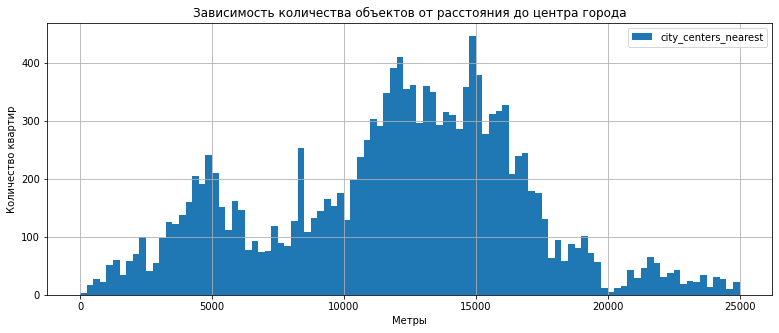

In [79]:
data_upd.plot(
    y='city_centers_nearest',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(0, 25000),
    title='Зависимость количества объектов от расстояния до центра города'
)
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Наибольшее количество предложений квартир на расстоянии от 11 до 17 км от центра города c максимумом около 12 и 15 км, так же имеется всплес на удаленности около 5 км от центра. Чем дальше находится квартира от центра, начиная с 17 км, тем меньше предложений квартир. Самая большая отдаленность от города - 65 км 968 метров. Ближе всего к центру города - 181 метр. Медиана - 13 км 166 метров, среднее - 14 км 333 метр.

##### **Расстояние до ближайшего парка ('parks_nearest').**

In [80]:
data_upd['parks_nearest'].describe()

count    7315.000000
mean      489.496377
std       338.300739
min         1.000000
25%       288.000000
50%       455.000000
75%       611.500000
max      3190.000000
Name: parks_nearest, dtype: float64

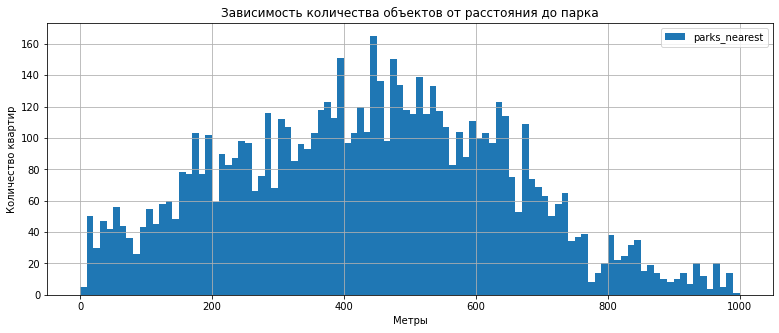

In [81]:
data_upd.plot(
    y='parks_nearest',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(0, 1000),
    title='Зависимость количества объектов от расстояния до парка'
)
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**: Пик наблюдается на расстоянии до парка около 400 и 420 метров, максимальное количество предложений квартир на расстоянии от 150 до 700 метров, далее идет снижение предложений. Самое большое расстояние до ближайшего парка - 3190 метров, самый близкий парк находится в 1 метре, возможно, что дом находится на линии входа в парк. Медиана - 455 метров.

**Проверка доли удаленных данных из исходного датафрейма:**

In [82]:
display(f'Размер data_upd после удаления аномалий/выбросов: {data_upd.shape[0]} строк')

'Размер data_upd после удаления аномалий/выбросов: 21430 строк'

In [83]:
upd = (1 - (data_upd.shape[0] / data.shape[0])) * 100
display(f'Доля удаленных данных составляет: {upd} %')

'Доля удаленных данных составляет: 9.574243638972114 %'

**Вывод:** количество удаленных данных (аномалий, выбросов) во время анализа составляет меньше 10%, что является допустимым и не влияет на результат исследования.

**Общий вывод:**

**Общая площадь**. Наибольшее количество предложений квартир с общей площадью от 30 до 62 кв.м, пик достигается на площади около 45 кв.м. Площади от 100 кв.м и более встречаются довольно редко. Минимальная общая площадь квартир 12.0 кв.м, максимальная - 200.0 кв.м. Медианное значение площади - 51.9 кв.м, среднее - 58.18 кв.м.

**Жилая площадь**. Наибольшее количество предложений квартир с жилой площадью примерно от 15 до 20 кв.м и от 27 до 33 кв.м, пик достигается на площади около 18 кв.м. Заметен сильный спад предложений с жилой площадью около 23 кв.м, а так же более 50 кв.м. Минимальная жилая площадь квартир 6.0 кв.м, максимальная - 164.7 кв.м. Медианное значение площади - 30.0 кв.м, среднее - 33.26 кв.м.

**Площадь кухни**. Наибольшее количество предложений квартир с площадью кухни около 6 кв.м, так же наиболее часто встречаются кухни площадью 8 и 10 кв.м, затем 7, 9, 11 и 12 кв.м. Минимальная площадь кухни 1.3 кв.м, максимальная - 93.2 кв.м. Медианное значение площади - 9.0 кв.м, среднее - 10.34 кв.м.

**Цена объекта**. Наибольшее количество предложений квартир со стоимостью от 3.0 до 5.0 млн.руб, наиболее часто встречающиеся цены около: 3.5 млн.руб, 3.7 млн.руб, 4.5 млн.руб, но больше всего предложений за 4 млн.руб. Минимальная цена квартиры 12190 руб, максимальная - 49.9 млн руб. Медианное значение цены - 4.6 млн руб, среднее - 5.84 млн руб.

**Количество комнат**. Наибольшее количество предложений с однокомнатными квартирами, на втором месте двухкомнатные. По мере увеличения количества комнат, количество предложений снижается. Минимальное количество комнат 0 (ноль) - вероятно, что это ошибка, максимальное - 7. Медианное значение - 2, среднее - 2.

**Высота потолков**. Наибольшее количество предложений с высотой потолков около 2.80 м, на втором месте по популярности высота 2.5 м. Минимальная высота потолков в квартире 2.0 м, максимальная - 5.8 кв.м. Медианное значение высоты - 2.7 м, среднее - 2.72 кв.м, очень маленькое стандартное отклонение.

**Тип этажа квартиры**. Наибольшее количество предложений квартир на всех этажах, кроме первого и последнего. Квартир на первом этаже 2601, на последнем этаже - 3009, в категории "другой" - 15850. Такое количество в "другой" обусловлено большим количеством многоэтажных домов, в эту категорию вошли все промежуточные этажи между первым и последним.

**Общее количество этажей в доме**. Наибольшее количество предложений квартир в пятиэтажных домах, далее - в девятиэтажных. В домах с этажами более 25 - гораздо меньше квартир. Минимальное количество этажей в доме - 1, максимальное - 29. Медианное значение - 9, среднее - 10.

**Расстояние до центра города в метрах**. Наибольшее количество предложений квартир на расстоянии от 11 до 17 км от центра города c максимумом около 12 и 15 км, так же имеется всплес на удаленности около 5 км от центра. Чем дальше находится квартира от центра, начиная с 17 км, тем меньше предложений квартир. Самая большая отдаленность от города - 65.968 км. Ближе всего к центру города - 181 метров. Медиана - 13.166 км, среднее - 14.333 км.

**Расстояние до ближайшего парка**. Пик наблюдается на расстоянии до парка около 400 и 420 метров, максимальное количество предложений квартир на расстоянии от 150 до 700 метров, далее идет снижение предложений. Самое большое расстояние до ближайшего парка - 3190 метров, самый близкий парк находится в 1 метре, возможно, что дом находится на линии входа в парк. Медиана - 455 метров.

In [84]:
data_upd.min()

total_images                                 0
last_price                               12190
total_area                                12.0
first_day_exposition       2014-11-27 00:00:00
rooms                                        0
ceiling_height                             2.0
floors_total                                 1
living_area                                6.0
floor                                        1
is_apartment                             False
studio                                   False
open_plan                                False
kitchen_area                               1.3
balcony                                      0
locality_name                          unknown
airports_nearest                           0.0
city_centers_nearest                     181.0
parks_around_3000                            0
parks_nearest                              1.0
ponds_around_3000                            0
ponds_nearest                             13.0
days_expositi

#### Анализ времени продажи квартир.

В столбце 'days_exposition' указаны данные с количеством дней размещения объявления. Изучим данные:

In [85]:
data_upd['days_exposition'].describe()

count    18531.000000
mean       183.701095
std        219.942293
min          1.000000
25%         44.000000
50%        100.000000
75%        237.000000
max       1580.000000
Name: days_exposition, dtype: float64

Самая быстрая продажа квартиры - за 1 день, самая долгая продажа - 1580 дней (больше 4 лет). Среднее количество дней - 180, медиана - 95 дней, что снова говорит о том, что медиана более точный показатель, независящий от выбросов.

Построим гистограмму:

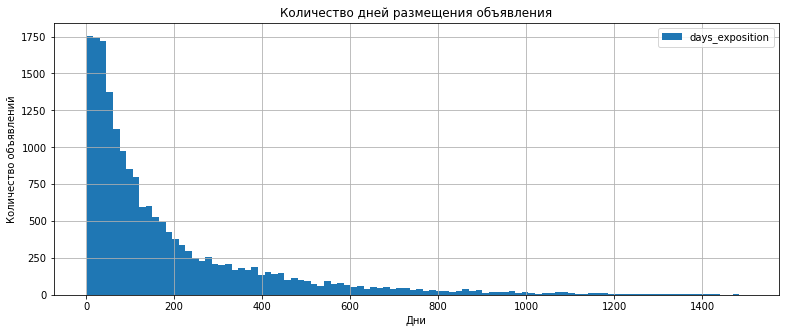

In [86]:
data_upd.plot(
    y='days_exposition',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(1, 1500),
    title='Количество дней размещения объявления'
)
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()

Для наглядности изменим параметр range, чтобы изучить распределение значений:

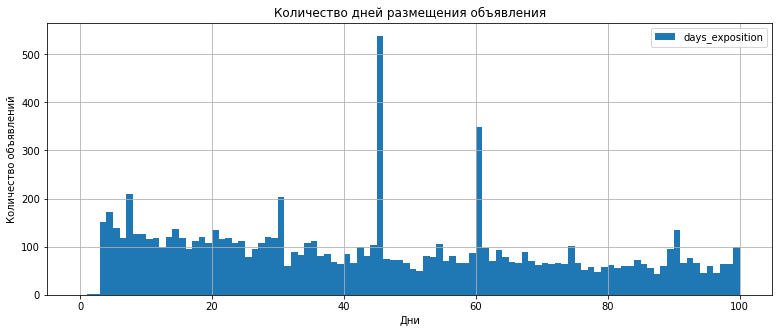

In [87]:
data_upd.plot(
    y='days_exposition',
    grid=True,
    figsize=(13, 5),
    kind='hist',
    bins=100,
    range=(0, 100),
    title='Количество дней размещения объявления'
)
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()

Видна некоторая закономерность всплесков на 30, 45, 60 и 90 дней. Возможно, что объявления были размещены на 30 дней и далее продлевались на 15 или 30 дней дополнительно по мере окончания срока, в связи с чем мы имеем выбросы: момент окончания срока размещения объявления > объявление снято > посчитано количество дней размещения объявления.

**Вывод**: В среднем, квартиры продаются за время от 45 до 232 дней (1 и 3 квартили), точнее - за 180 дней (среднее значение), медиана - 95 дней. Самая долгая продажа заняла более 4 лет (1580 дней), но есть и те, кто продал квартиру всего за 1 день. 

Быстрыми можно считать продажи менее, чем за 45 дней (1 квартиль), а необычайно долгими - от 232 дней (3 квартиль).

#### Анализ зависимости цены от параметров/характеристик квартиры.

##### Общий анализ.

Создадим отдельную таблицу с необходимыми для анализа данными:

In [88]:
columns_to_copy = data_upd[['last_price', 'total_area', 'living_area', 'kitchen_area', 
                        'rooms', 'weekday_exposition', 'month_exposition', 'year_exposition', 'type_floor']]
data_for_corr = columns_to_copy.copy()
data_for_corr.head(10)

,last_price,total_area,living_area,kitchen_area,rooms,weekday_exposition,month_exposition,year_exposition,type_floor
0,13000000,108.00,51.00,25.00,3,3,3,2019,другой
1,3350000,40.40,18.60,11.00,1,1,12,2018,первый
2,5196000,56.00,34.30,8.30,2,3,8,2015,другой
4,10000000,100.00,32.00,41.00,2,1,6,2018,другой
5,2890000,30.40,14.40,9.10,1,0,9,2018,другой
6,3700000,37.30,10.60,14.40,1,3,11,2017,другой
8,2900000,33.16,15.43,8.81,1,2,5,2018,другой
9,5400000,61.00,43.60,6.50,3,6,2,2017,другой
10,5050000,39.60,20.30,8.50,1,3,11,2017,другой
11,3300000,44.00,31.00,6.00,2,0,8,2018,другой


Построим матрицу корреляции для численных значений и тепловую карту для ее визуализации:

In [89]:
data_for_corr[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.765508,0.650781,0.585466,0.475832
total_area,0.765508,1.000000,0.924880,0.562736,0.794674
living_area,0.650781,0.924880,1.000000,0.319562,0.873776
kitchen_area,0.585466,0.562736,0.319562,1.000000,0.194141
rooms,0.475832,0.794674,0.873776,0.194141,1.000000


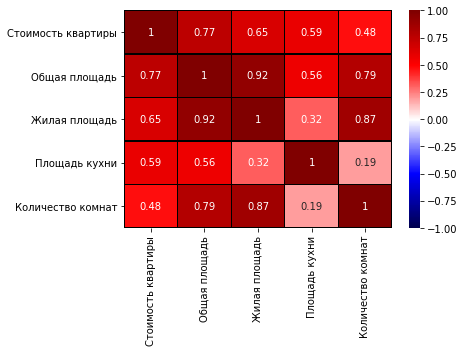

In [90]:
data_for_corr_labels = ['Стоимость квартиры', 
                        'Общая площадь', 'Жилая площадь', 
                        'Площадь кухни', 'Количество комнат']

seaborn.heatmap(data_for_corr[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr(), 
                annot=True, vmin=-1, vmax=1, center=0, cmap='seismic', 
                linecolor='black', linewidths=0.3, 
               xticklabels=data_for_corr_labels, yticklabels=data_for_corr_labels,)
seaborn.set(rc={'figure.figsize' : (10, 5)})

**Вывод:** Стоимость квартиры зависит от общей площади: чем больше площадь - тем выше стоимость. Такая же зависимость цены от площади жилой и площади кухни, что вполне логично, т.к. жилая площадь и кухня являются составляющими частями общей площади. Прослеживается небольшая зависимость и от количества комнат: больше комнат - выше цена.

##### Подробный анализ.

**Зависимость стоимости квартиры от общей площади**. Строим график:

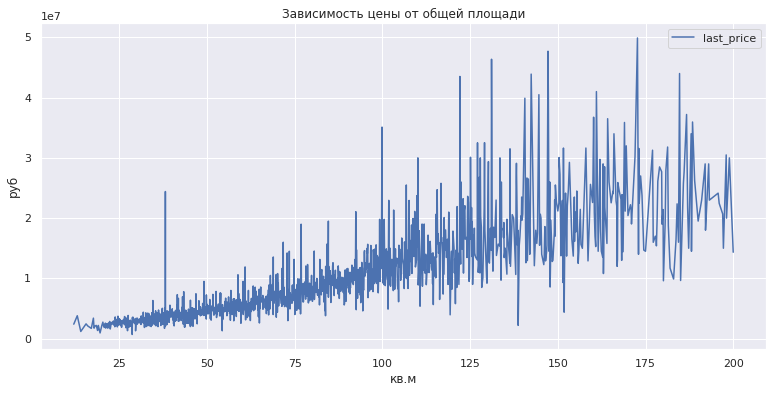

In [91]:
data_for_corr.pivot_table(index='total_area', values='last_price').sort_values(by='total_area').plot(figsize=(13, 6))
plt.xlabel('кв.м')
plt.ylabel('руб')
plt.title('Зависимость цены от общей площади')
plt.show()

**Вывод:** Стоимость квартиры зависит от общей площади: чем больше площадь - тем выше стоимость.

**Зависимость стоимости квартиры от жилой площади**. Строим график:

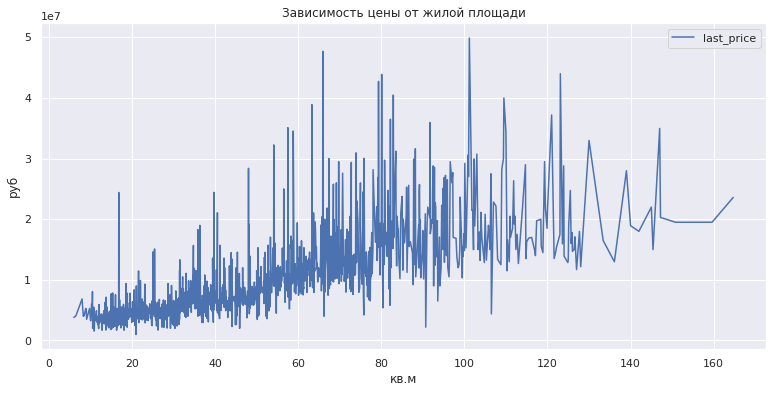

In [92]:
data_for_corr.pivot_table(index='living_area', values='last_price').sort_values(by='living_area').plot(figsize=(13, 6))
plt.xlabel('кв.м')
plt.ylabel('руб')
plt.title('Зависимость цены от жилой площади')
plt.show()

**Вывод:** Стоимость квартиры зависит от жилой площади: чем больше площадь - тем выше стоимость.

**Зависимость стоимости квартиры от площади кухни**. Строим график:

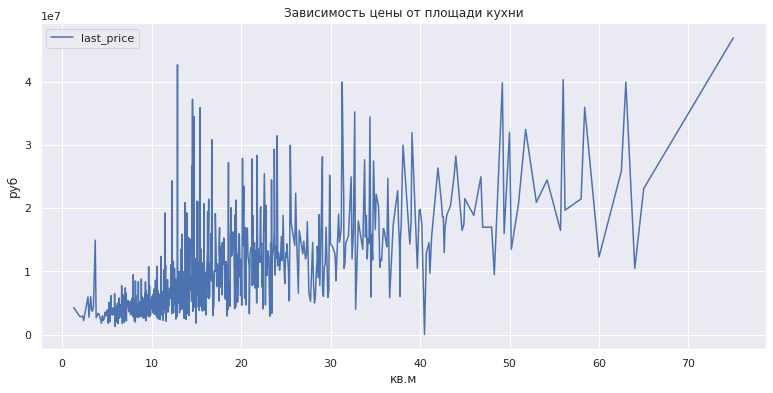

In [93]:
data_for_corr.pivot_table(index='kitchen_area', values='last_price').sort_values(by='kitchen_area').plot(figsize=(13, 6))
plt.xlabel('кв.м')
plt.ylabel('руб')
plt.title('Зависимость цены от площади кухни')
plt.show()

**Вывод:** Стоимость квартиры зависит от площади кухни: чем больше площадь - тем выше стоимость.

**Зависимость стоимости квартиры от количества комнат**. Строим график:

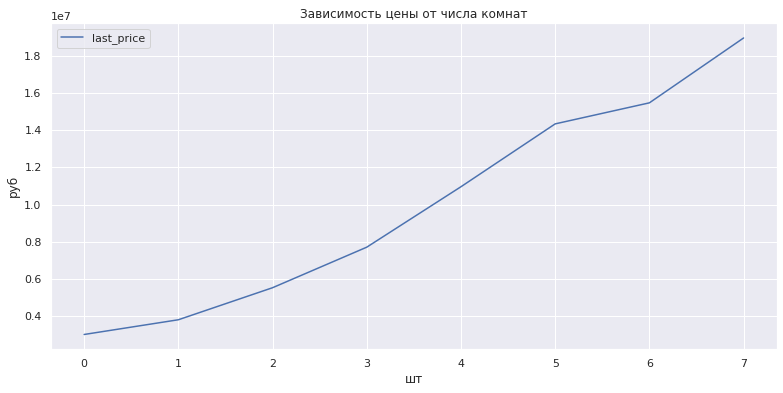

In [94]:
data_for_corr.pivot_table(index='rooms', values='last_price').sort_values(by='rooms').plot(figsize=(13, 6))
plt.xlabel('шт')
plt.ylabel('руб')
plt.title('Зависимость цены от числа комнат')
plt.show()

**Вывод:** Стоимость квартиры зависит от числа комнат: чем их больше - тем выше стоимость.

**Зависимость стоимости квартиры от типа этажа.** Типы этажей ('type_floor'), на которых находится квартира: "первый" - первый этаж, "последний" - последний этаж, "другой" - все этажи, кроме первого и последнего. Найдем среднюю цену и медиану по типу этажей. Строим график:

In [95]:
connect_price_type_floor = data_for_corr.pivot_table(index='type_floor', values='last_price', 
                                                     aggfunc=['mean', 'median'])
connect_price_type_floor.columns = ['mean', 'median']
connect_price_type_floor

,mean,median
type_floor,,
другой,6.107719e+06,4800000
первый,4.621690e+06,3950000
последний,5.645251e+06,4300000


Сразу видно как зависит средняя цена от выбросов, поэтому для исследования зависимости используем медиану.

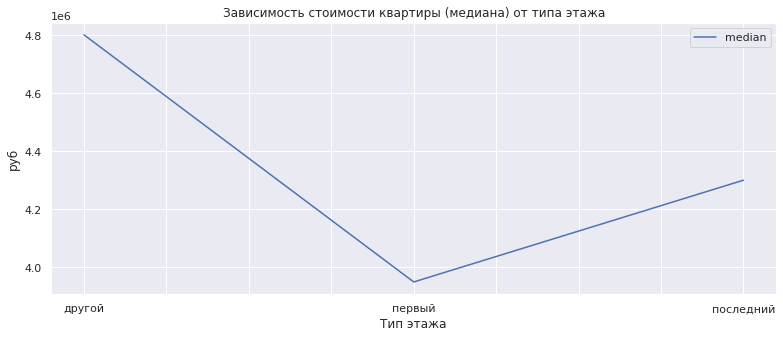

In [96]:
connect_price_type_floor.plot(
    y='median',
    figsize=(13, 5),
    title='Зависимость стоимости квартиры (медиана) от типа этажа'
)
plt.xlabel('Тип этажа')
plt.ylabel('руб')
plt.show()

**Вывод:** Стоимость квартиры (медианная стоимость) зависит от типа этажа: самые дешевые квартиры на 1 этаже, далее - на последнем этаже, и самые дорогие на этажах типа "другой".

**Зависимость стоимости квартиры от даты размещения объявления.** Данные:
- 'last_price' - стоимость объекта;
- 'weekday_exposition' - день недели размещения объявления;
- 'month_exposition' - месяц размещения объявления;
- 'year_exposition' - год размещения объявления.

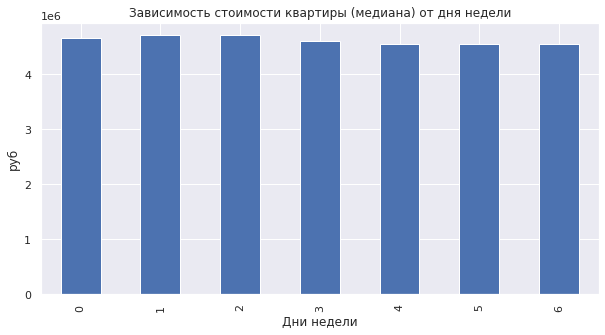

In [97]:
connect_price_weekday = data_for_corr.pivot_table(index='weekday_exposition', 
                                                  values='last_price', 
                                                     aggfunc='median')

connect_price_weekday.plot(kind='bar', legend=False)
plt.xlabel('Дни недели')
plt.ylabel('руб')
plt.title('Зависимость стоимости квартиры (медиана) от дня недели')
plt.show()

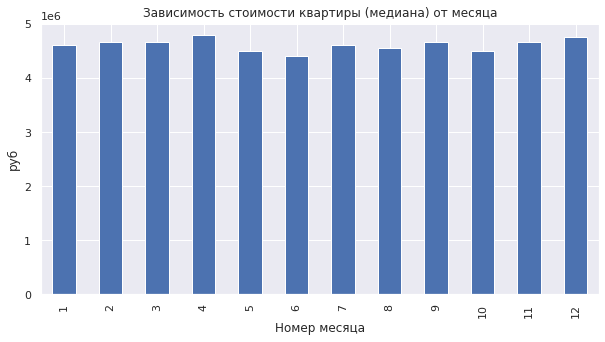

In [98]:
connect_price_month = data_for_corr.pivot_table(index='month_exposition', 
                                                  values='last_price', 
                                                     aggfunc='median')

connect_price_month.plot(kind='bar', legend=False)
plt.xlabel('Номер месяца')
plt.ylabel('руб')
plt.title('Зависимость стоимости квартиры (медиана) от месяца')
plt.show()

Text(0.5, 1.0, 'Зависимость стоимости квартиры (медиана) от года публикации')

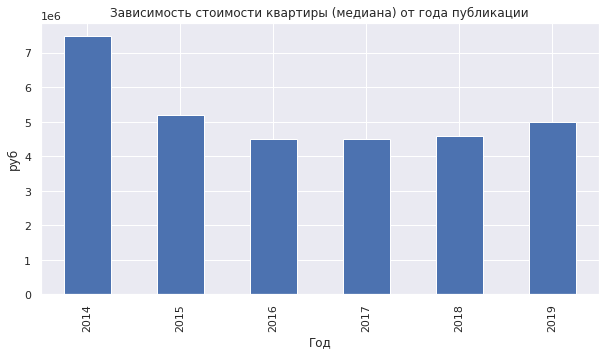

In [99]:
connect_price_year = data_for_corr.pivot_table(index='year_exposition', 
                                                  values='last_price', 
                                                     aggfunc='median')

connect_price_year.plot(kind='bar', legend=False)
plt.xlabel('Год')
plt.ylabel('руб')
plt.title('Зависимость стоимости квартиры (медиана) от года публикации')

**Вывод:** 

Стоимость квартир (медиана) от:
- дня недели практически не зависит;
- месяца так же практически не зависит, однако, в июле (6 месяц) оказались самые дешевые квартиры;
- года публикации: рынок жилья в 2014 году оказался самым "дорогостоящимся", с 2015 заметен спад цен на квартиры (возможно, это спровоцировано экономической ситуацией и падением спроса, который влечет за собой и падение цены на предложения), который с 2019 года начал восстанавливаться.

**Общий вывод:** Факторами, которые больше всего влияют на общую (полную) стоимость объекта, являются: 

- общая площадь, жилая площадь и площадь кухни. Вполне объяснимо, что эти три фактора влияют, т.к. жилая площадь и площадь кухни являются составными частями общей площади. При увеличении какой-то 1 из этих площадей, увечивается стоимость квартиры.
- количество комнат.Так же имеет влияние на цену и так же является составляющей общей площади. Больше комнат - цена растет.
- тип этажа. Самые дешевые квартиры на 1 этаже, далее - на последнем этаже, а самые дорогие на всех промежуточных этажах, кроме первого и последнего. 

От дня недели и месяца стоимость квартир не зависит. Необычным фактом стало то, что рынок жилья в 2014 году оказался самым "дорогостоящимся", с 2015 заметен спад цен на квартиры (возможно, это спровоцировано экономической ситуацией и падением спроса, который влечет собой и падение цены на предложения), который с 2019 года начал восстанавливаться.

#### Анализ цены за квадратный метр по населенным пунктам.

Для анализа берем 10 населенных пунктов с наибольшим количеством объявлений. Построим свободную таблицу с отобранными населенными пунктами, количеством объявлений и средней ценой квадратного метра для них:

In [100]:
top_10 = data_upd['locality_name'].value_counts().head(10)
top_10

санкт-петербург    14305
мурино               523
кудрово              424
шушары               404
всеволожск           371
пушкин               340
колпино              327
парголово            301
гатчина              292
петергоф             197
Name: locality_name, dtype: int64

In [101]:
locality_top_10 = data_upd.query('locality_name in @top_10.index').pivot_table(index='locality_name', 
                                                                           values='price_metre')
locality_top_10_count = data_upd.query('locality_name in @top_10.index').pivot_table(index='locality_name', 
                                                                                 values='price_metre', aggfunc='count')
locality_top_10_count.columns = ['count']
locality_top_10['count'] = locality_top_10_count['count']
locality_top_10.columns = ['Средняя цена за 1 кв.м', 'Количество объявлений']
locality_top_10['Средняя цена за 1 кв.м'] = locality_top_10['Средняя цена за 1 кв.м'].astype(int)
locality_top_10 = locality_top_10.sort_values(by='Средняя цена за 1 кв.м', ascending=False)
locality_top_10

,Средняя цена за 1 кв.м,Количество объявлений
locality_name,,
санкт-петербург,111627,14305
пушкин,103429,340
кудрово,95716,424
парголово,90442,301
мурино,86636,523
петергоф,84480,197
шушары,78886,404
колпино,75249,327
всеволожск,68880,371


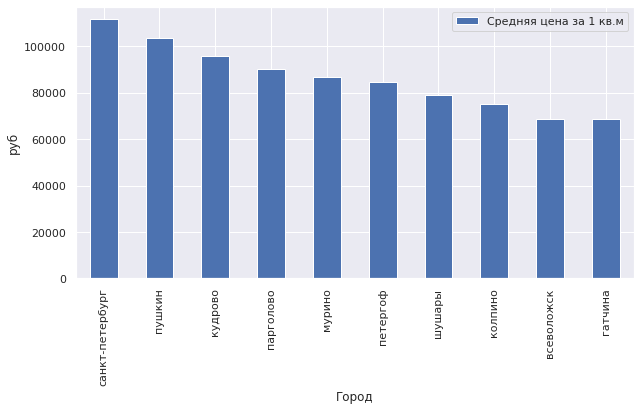

In [102]:
locality_top_10.plot(kind='bar', y='Средняя цена за 1 кв.м')
plt.xlabel('Город')
plt.ylabel('руб')
plt.show()

**Вывод:** из городов с наибольшим количеством объявлений можно выделить:
- Санкт-Петербург - город с самой высокой ценой за 1 кв.м - 114627 руб;
- Гатчина - город с самым дешевым квадратным метром - 68627 руб.

#### Анализ стоимости объектов Санкт-Петербурга на разном расстоянии от центра.

Перенесем в новую таблицу все объявления о продаже по городу Санкт-Петербург, в которую войдут: стоимость квартиры (руб) и расстояние до центра (км):

In [103]:
spb = data_upd.query('locality_name == "санкт-петербург"')
flats_spb = spb[['locality_name', 'last_price', 'city_centers_nearest_km']]
flats_spb.head()

,locality_name,last_price,city_centers_nearest_km
0,санкт-петербург,13000000,16.0
2,санкт-петербург,5196000,14.0
4,санкт-петербург,10000000,8.0
9,санкт-петербург,5400000,15.0
10,санкт-петербург,5050000,14.0


Рассчитаем среднюю стоимость квартир в зависимости от расстояния до центра и построим график изменения средней цены для каждого километра:

In [104]:
flats_spb_mean_price = flats_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
flats_spb_mean_price.columns = ['Средняя цена']
flats_spb_mean_price.head()

,Средняя цена
city_centers_nearest_km,
0.0,2.031908e+07
1.0,1.214812e+07
2.0,1.195527e+07
3.0,9.869825e+06
4.0,1.058218e+07


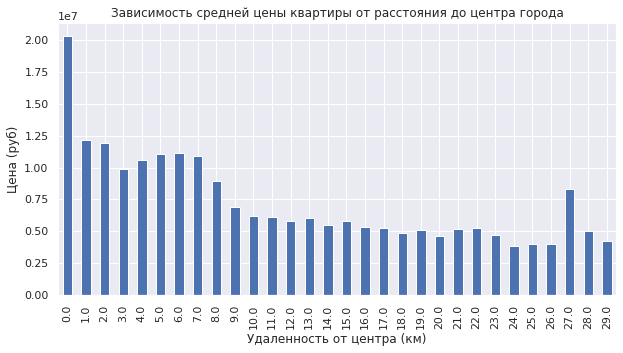

In [105]:
flats_spb_mean_price.plot(kind='bar', legend=False)
plt.xlabel('Удаленность от центра (км)')
plt.ylabel('Цена (руб)')
plt.title('Зависимость средней цены квартиры от расстояния до центра города')
plt.show()

**Вывод:** Самые дорогие квартиры в самом центре Санкт-Петербурга (до 1 км). По мере отдаления от центра, цена понижается, но заметен рост цен в радиусе 5-7 км, возможно, там находится один из элитных районов Санкт-Петербурга, что дает повышение стоимости квартир. 

### Общий вывод

При выполнении проекта была изучена информация о датафрейме, исходные данные.

**В процессе предобработки данных были выявлены:**
- некорректные записи названий колонок - исправлены;
- пропуски - некоторые заполнены, некоторые оставлены без изменений;
- неверные типы данных - изменены на нужные;
- неявные дубликаты - исправлены;
- аномальные значения - исправлены, удалены.

**Возможные причины пропусков/ошибок:**

- человеческий фактор;
- ошибки при выгрузке либо загрузке данных;
- ошибки при сохранении данных.

**В датафрейм добавлены новые колонки со следующими параметрами:**

- 'price_metre' - цена одного квадратного метра;
- 'weekday_exposition' - день недели публикации объявления;
- 'month_exposition' - месяц публикации объявления;
- 'year_exposition' - год публикации объявления;
- 'type_floor' - тип этажа квартиры, где: 'первый' - первый этаж, 'последний' - последний этаж, 'другой' - любой другой этаж, кроме первого и последнего;
- 'city_centers_nearest_km' - расстояние до центра в километрах.

**В процессе исследовательского анализа данных:**
- были изучены параметры объектов (общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка). Построены отдельные гистограммы для каждого из этих параметров; 
- было изучено, как быстро продавались квартиры (сколько дней было размещено каждое объявление). Построена гистограмма. Посчитаны среднее и медиана;
- определены факторы, которые больше всего влияют на общую (полную) стоимость объекта. Построены графики, которые показывают зависимость цены от параметров объекта;
- посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.Построена сводная таблица с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов;
- вычислена средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра, учтен каждый километр расстояния. Построен график изменения средней цены для каждого километра от центра Санкт-Петербурга.

**На основании этого было получено представление о типичном объекте недвижимости:** квартира общей площадью около 45 кв.м, в которой жилая площадь около 18 кв.м и кухня 6 кв.м, высота потолков около 2.80 м. Чаще всего это однокомнатная или двухкомнатная квартира, расположенная не на первом и не на последнем этаже, в пятиэтажном или девятиэтажном доме, общая стоимость которой около 4 млн. руб. Располагается дом примерно в 15 км от центра города, в пешей доступности (400 м) находится парк.

В среднем, квартиры продаются за время от 45 до 232 дней. 

**Факторами, которые больше всего влияют на общую (полную) стоимость объекта, являются:**

- общая площадь, жилая площадь и площадь кухни. Вполне объяснимо, что эти три фактора влияют, т.к. жилая площадь и площадь кухни являются составными частями общей площади. При увеличении какой-то 1 из этих площадей, увечивается стоимость квартиры.
- количество комнат.Так же имеет влияние на цену и так же является составляющей общей площади. Больше комнат - цена растет.
- тип этажа. Самые дешевые квартиры на 1 этаже, далее - на последнем этаже, а самые дорогие на всех промежуточных этажах, кроме первого и последнего.

Из городов с наибольшим количеством объявлений можно выделить:

- Санкт-Петербург - город с самой высокой ценой за 1 кв.м - 114627 руб;
- Гатчина - город с самым дешевым квадратным метром - 68627 руб.

Самые дорогие квартиры в самом центре Санкт-Петербурга (до 1 км). По мере отдаления от центра, цена понижается, но заметен рост цен в радиусе 5-7 км, возможно, там находится один из элитных районов Санкт-Петербурга, что дает повышение в стоимости квартир.
